In [1]:
from pandas import read_csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, 
                        activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


In [3]:
## example with real data on sunspot

# Parameter split_percent defines the ratio of training examples
def get_train_test(url, split_percent=0.8):
    df = read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data
 
sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
train_data, test_data, data = get_train_test(sunspots_url)



In [4]:
#change a single time series into (input, output) data

# Prepare the input X and target Y
def get_XY(dat, time_steps):
    # Indices of target array
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    # Prepare X
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y
 
time_steps = 12
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)


In [5]:
#build RNN
#hidden unit = 3, output = 1, inputshape is T =12 scalar value
model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1), 
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=40, batch_size=1, verbose=2)

2022-04-25 12:30:05.176754: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-25 12:30:05.177524: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/40
 - 1s - loss: 0.0108
Epoch 2/40
 - 1s - loss: 0.0055
Epoch 3/40
 - 1s - loss: 0.0053
Epoch 4/40
 - 1s - loss: 0.0052
Epoch 5/40
 - 1s - loss: 0.0049
Epoch 6/40
 - 1s - loss: 0.0048
Epoch 7/40
 - 1s - loss: 0.0047
Epoch 8/40
 - 1s - loss: 0.0046
Epoch 9/40
 - 1s - loss: 0.0045
Epoch 10/40
 - 1s - loss: 0.0044
Epoch 11/40
 - 1s - loss: 0.0044
Epoch 12/40
 - 1s - loss: 0.0043
Epoch 13/40
 - 1s - loss: 0.0042
Epoch 14/40
 - 1s - loss: 0.0042
Epoch 15/40
 - 1s - loss: 0.0042
Epoch 16/40
 - 1s - loss: 0.0040
Epoch 17/40
 - 1s - loss: 0.0042
Epoch 18/40
 - 1s - loss: 0.0042
Epoch 19/40
 - 1s - loss: 0.0040
Epoch 20/40
 - 2s - loss: 0.0040
Epoch 21/40
 - 1s - loss: 0.0041
Epoch 22/40
 - 1s - loss: 0.0041
Epoch 23/40
 - 1s - loss: 0.0039
Epoch 24/40
 - 1s - loss: 0.0041
Epoch 25/40
 - 3s - loss: 0.0039
Epoch 26/40
 - 2s - loss: 0.0041
Epoch 27/40
 - 3s - loss: 0.0041
Epoch 28/40
 - 3s - loss: 0.0039
Epoch 29/40
 - 3s - loss: 0.0040
Epoch 30/40
 - 3s - loss: 0.0040
Epoch 31/40
 - 3s -

In [6]:
def print_error(trainY, testY, train_predict, test_predict):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    
 
#make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# Mean square error
print_error(trainY, testY, train_predict, test_predict)

Train RMSE: 0.061 RMSE
Test RMSE: 0.076 RMSE


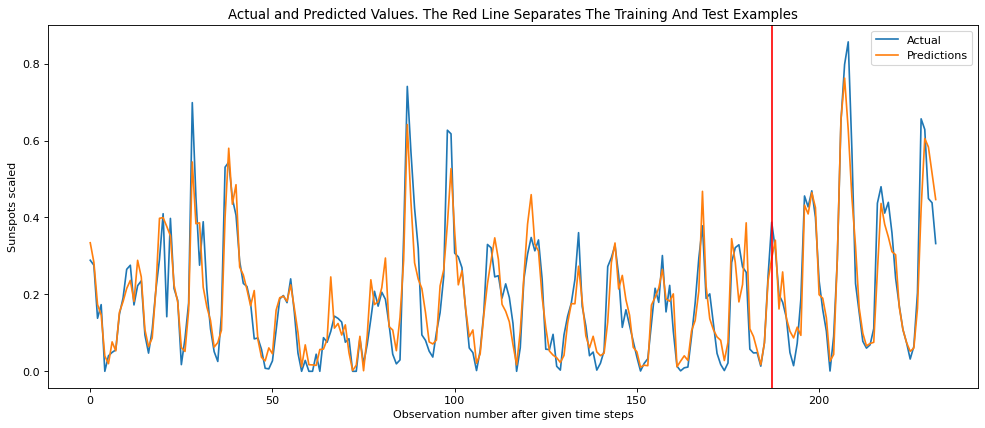

In [7]:
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')
plot_result(trainY, testY, train_predict, test_predict)